<a href="https://colab.research.google.com/github/VishalK777/DSBDA/blob/DSBDA5/DSBDA5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
df = pd.read_csv('Social_Network_Ads.csv')
df.head()
df.info()
df.describe()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [ ]:
X = df[['Age', 'EstimatedSalary']]
Y = df['Purchased']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

print(f'Train Dataset Size - X: {X_train.shape}, Y: {Y_train.shape}')
print(f'Test  Dataset Size - X: {X_test.shape}, Y: {Y_test.shape}')

Train Dataset Size - X: (300, 2), Y: (300,)
Test  Dataset Size - X: (100, 2), Y: (100,)


Train Dataset Size - X: (300, 2), Y: (300,)
Test  Dataset Size - X: (100, 2), Y: (100,)

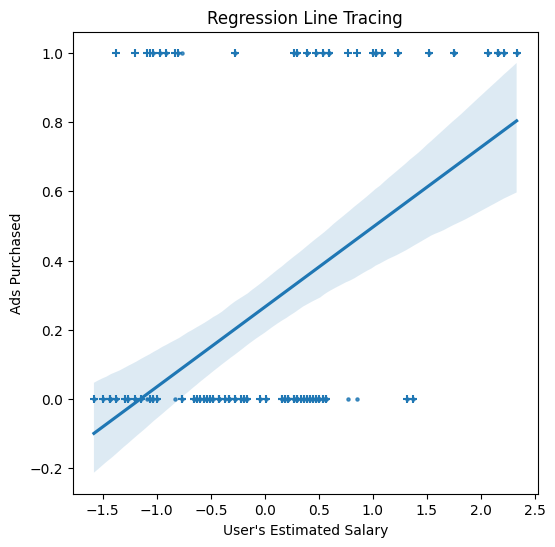

In [ ]:
from sklearn.linear_model import LogisticRegression

lm = LogisticRegression(random_state = 0, solver='lbfgs' )
lm.fit(X_train, Y_train)
predictions = lm.predict(X_test)

plt.figure(figsize=(6, 6));
sns.regplot(x = X_test[:, 1], y = predictions, scatter_kws={'s':5});
plt.scatter(X_test[:, 1], Y_test, marker = '+');
plt.xlabel("User's Estimated Salary");
plt.ylabel('Ads Purchased');
plt.title('Regression Line Tracing');

Confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

cm = confusion_matrix(Y_test, predictions)
print(f'''Confusion matrix :\n
               | Positive Prediction\t| Negative Prediction
---------------+------------------------+----------------------
Positive Class | True Positive (TP) {cm[0, 0]}\t| False Negative (FN) {cm[0, 1]}
---------------+------------------------+----------------------
Negative Class | False Positive (FP) {cm[1, 0]}\t| True Negative (TN) {cm[1, 1]}\n\n''')

cm = classification_report(Y_test, predictions)
print('Classification report : \n', cm)

Confusion matrix :

               | Positive Prediction	| Negative Prediction
---------------+------------------------+----------------------
Positive Class | True Positive (TP) 65	| False Negative (FN) 3
---------------+------------------------+----------------------
Negative Class | False Positive (FP) 8	| True Negative (TN) 24


Classification report : 
               precision    recall  f1-score   support

           0       0.89      0.96      0.92        68
           1       0.89      0.75      0.81        32

    accuracy                           0.89       100
   macro avg       0.89      0.85      0.87       100
weighted avg       0.89      0.89      0.89       100



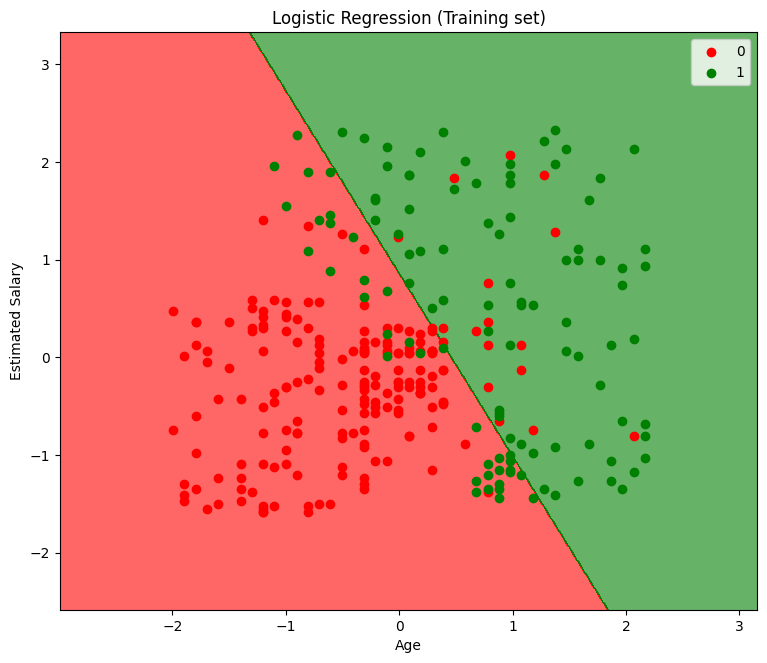

In [ ]:
# Visualizing the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, Y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.figure(figsize=(9, 7.5));
plt.contourf(X1, X2, lm.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.6, cmap = ListedColormap(('red', 'green')));
plt.xlim(X1.min(), X1.max());
plt.ylim(X2.min(), X2.max());
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color = ListedColormap(('red', 'green'))(i), label = j);
plt.title('Logistic Regression (Training set)');
plt.xlabel('Age');
plt.ylabel('Estimated Salary');
plt.legend();
plt.show();

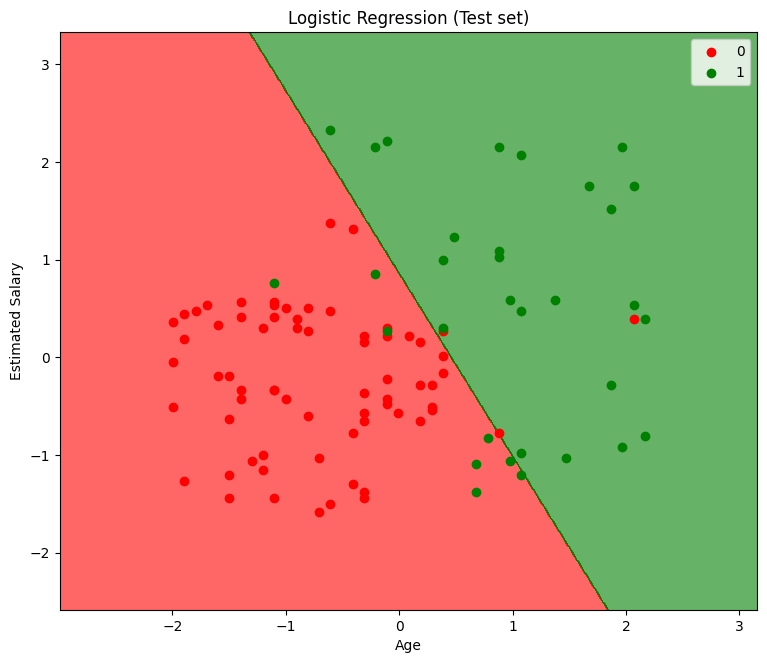

In [ ]:
# Visualizing the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, Y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.figure(figsize=(9, 7.5));
plt.contourf(X1, X2, lm.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.6, cmap = ListedColormap(('red', 'green')));
plt.xlim(X1.min(), X1.max());
plt.ylim(X2.min(), X2.max());
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color = ListedColormap(('red', 'green'))(i), label = j);
plt.title('Logistic Regression (Test set)');
plt.xlabel('Age');
plt.ylabel('Estimated Salary');
plt.legend();
plt.show();